# Study of data reuse: Electrophysiological recordings of striatal low threshold-spiking interneuron (v1)


In this notebook we will look more closely at the EBRAINS dataset " Electrophysiological recordings of striatal low threshold-spiking interneuron", contributed by Sten Grillner from the Department of Department of Neuroscience, Karolinska Institutet, Stockholm.https://doi.org/10.25493/5GE0-6MF.

As we can see from the dataset description,

The study entails the collection of single cell patch-clamp recordings, done in conjunction with morphological reconstructions, from low threshold-spikinginterneurons in the striatum. More information is available in the Data Descriptor.

This dataset forms part of the results reported in Hjorth JJJ, Kozlov A, Carannante I, Frost Nylén J, Lindroos R, Johansson Y, Tokarska A, Dorst MC, Suryanarayana SM, Silberberg G, Hellgren Kotaleski J, Grillner S. The microcircuits of striatum in silico. Proc Natl Acad Sci U S A. 2020 Apr 28;117(17):9554-9565. https://doi.org/10.1073/pnas.2000671117

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article.


### Notes

Python version: 3.12.3\
Numpy version: \
Matplotlib:

### Downloading the data

### Exploring and visualizing the data

In [1]:
cell_path = 'fs/derived/'
cell_id = '180418_FS5'
path = cell_path + cell_id
prefix = 'ECall'
channels = {'current': 6, 'voltage': 7}
liquid_junction_potential = 9.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_traces(path, prefix, protocol, channels, recordings,
                vshift=0, title=None, figsize=(12, 8)):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=figsize)
    ax1.set_ylabel('Voltage (mV)')
    ax2.set_ylabel('Current (pA)')
    ax2.set_xlabel('Time (ms)')
    if not title:
        title = protocol
    fig.suptitle(title)
    if len(recordings) > 1:
        color_cycle = [plt.cm.Blues(i) 
                       for i in np.linspace(0.3, 1, len(recordings))**2]
        ax1.set_prop_cycle('color', color_cycle)
        ax2.set_prop_cycle('color', color_cycle)
    for rec in reversed(recordings):
        fullname = path + '/' + prefix + '_' + protocol \
            + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
        data = np.loadtxt(fullname)
        time = data[:, 0]
        current = data[:, 1]
        fullname = path + '/' + prefix + '_' + protocol \
            + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
        data = np.loadtxt(fullname)
        voltage = data[:, 1] - vshift
        ax1.plot(time, voltage)
        ax2.plot(time, current)
    return fig




FileNotFoundError: fs/derived/180418_FS5/ECall_IV_ch6_659.dat not found.

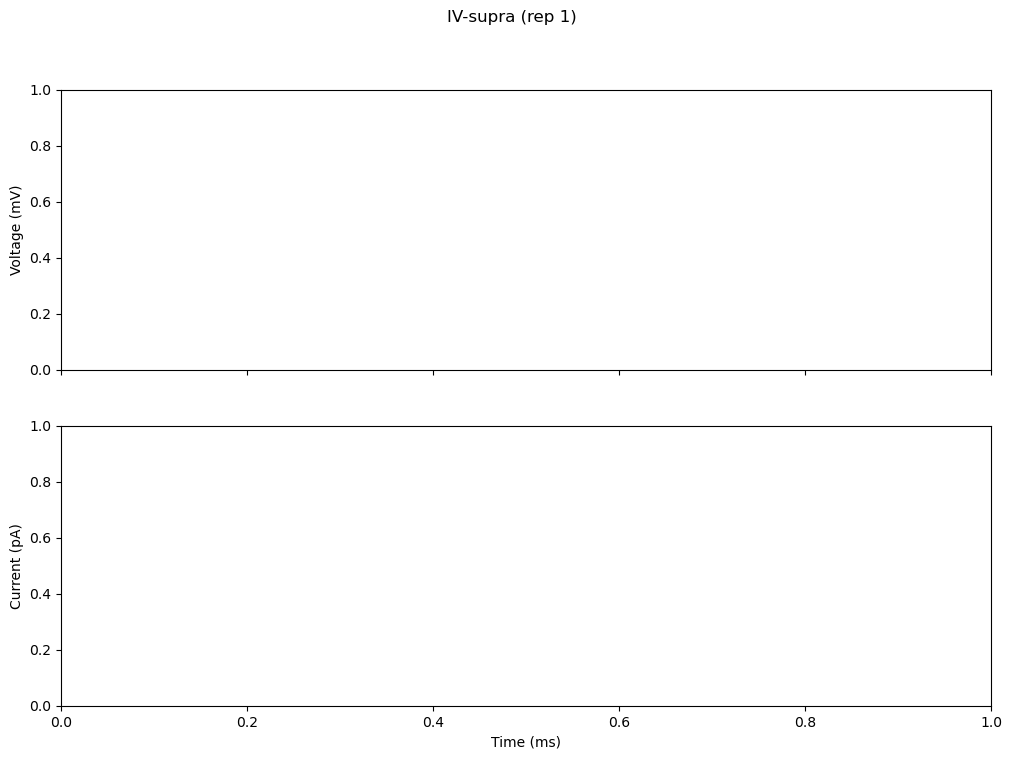

In [3]:
protocol = 'IV'
feature_protocol = 'IV-supra'
repetitions = [[657,658,659]]
vshift=liquid_junction_potential

for recordings in repetitions[0:1]:
    fig = plot_traces(path, prefix, protocol, channels, recordings, 
                      title=feature_protocol + ' (rep %d)' % len(repetitions),
                     vshift=liquid_junction_potential)

### Figure3B

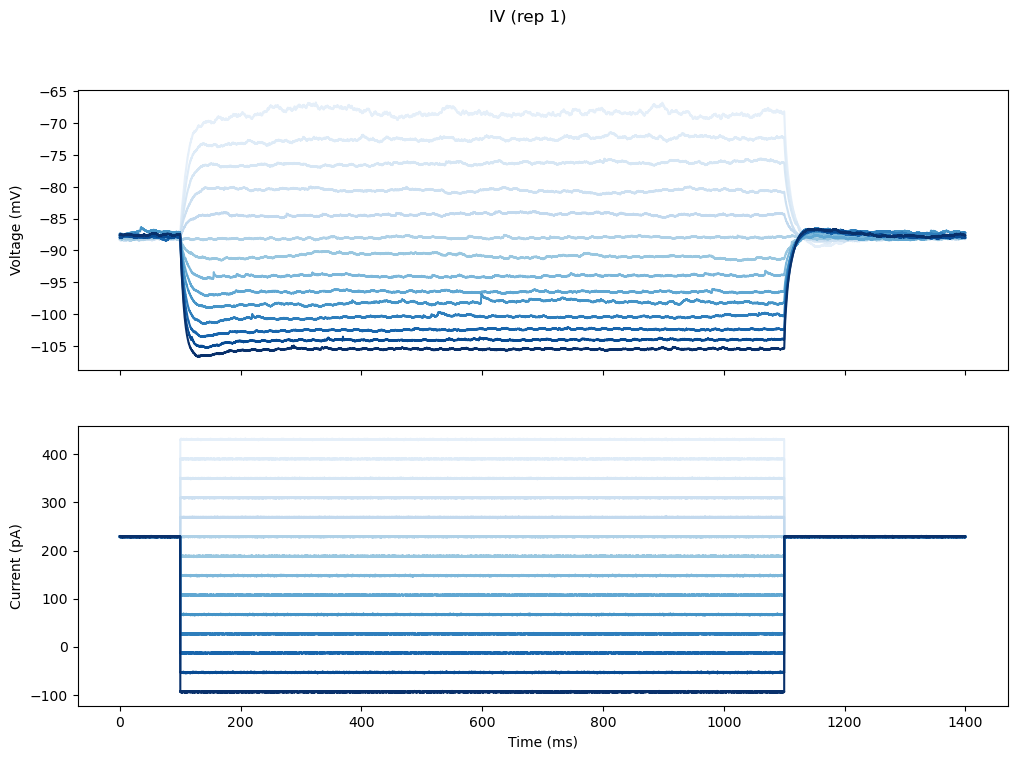

In [4]:
protocol = 'IV'
feature_protocol = protocol
repetitions = [range(1855, 1869)]

for recordings in repetitions[0:1]:
    fig = plot_traces(path, prefix, protocol, channels, recordings, 
                      title=feature_protocol + ' (rep %d)' % len(repetitions),
                     vshift=liquid_junction_potential)
    plt.show()

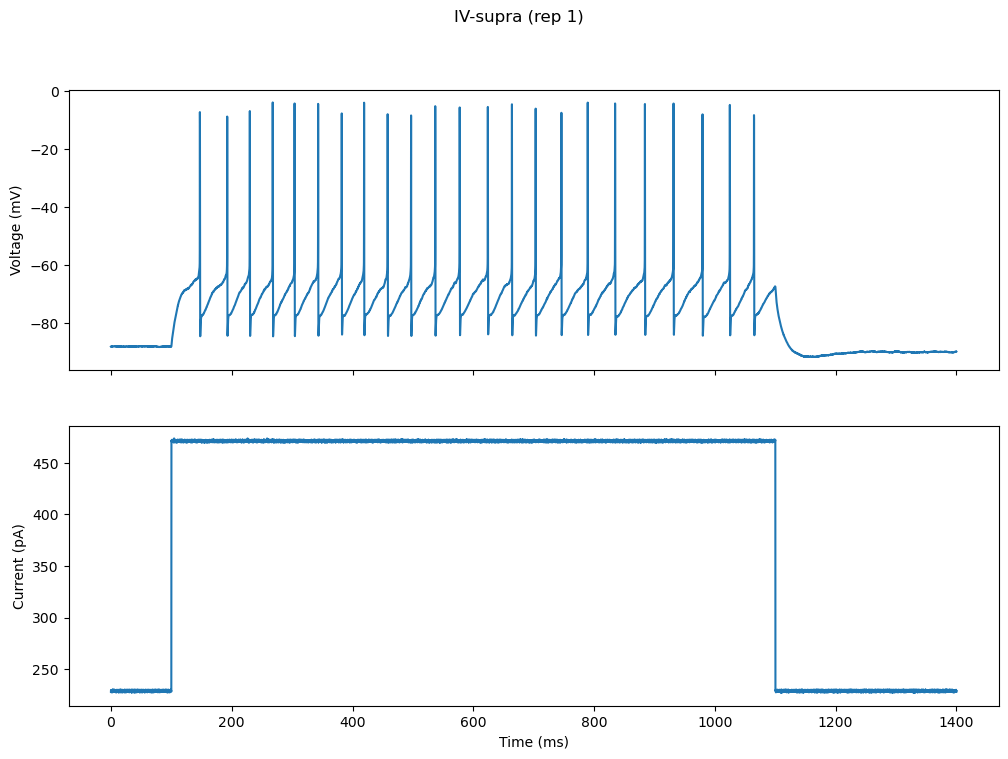

In [5]:
protocol = 'IV'
feature_protocol = 'IV-supra'
repetitions = [[1869]]

for recordings in repetitions[0:1]:
    fig = plot_traces(path, prefix, protocol, channels, recordings, 
                      title=feature_protocol + ' (rep %d)' % len(repetitions),
                     vshift=liquid_junction_potential)
    plt.show()

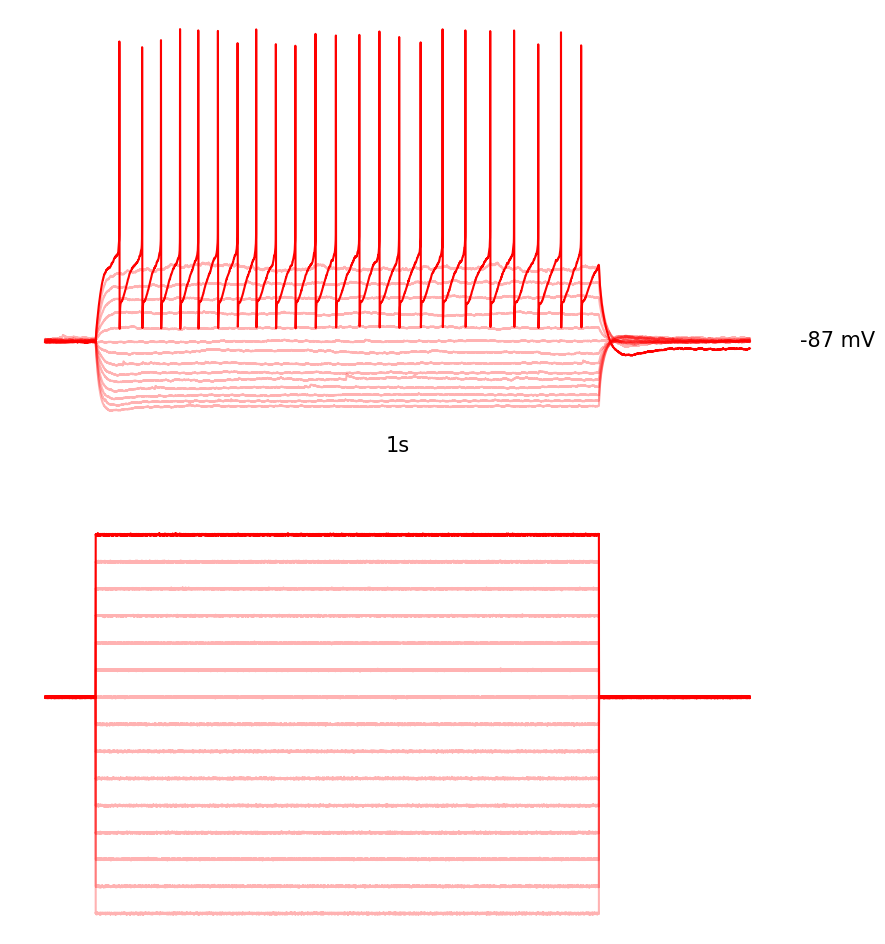

In [6]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 12))

protocol_1 = 'IV'
feature_protocol_1 = protocol_1
repetitions_1 = [range(1855, 1869)]
prefix_1 = 'ECall'
channels = {'current': 6, 'voltage': 7}


for rec in  range(1855, 1869):

    fullname = path + '/' + prefix_1 + '_' + protocol_1 \
    + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    time = data[:, 0]
    voltage = data[:, 1]
    ax1.plot(time,voltage, 'r', alpha=0.3)

    fullname = path + '/' + prefix_1 + '_' + protocol_1 \
        + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    time = data[:, 0]
    current = data[:, 1]
    ax2.plot(time,current, 'r', alpha=0.3)


fullname = path + '/' + prefix_1 + '_' + protocol_1 \
+ '_ch' + str(channels['voltage']) + '_' + str(1869) + '.dat'
data = np.loadtxt(fullname)
time = data[:, 0]
voltage = data[:, 1]
ax1.plot(time,voltage, 'r')

fullname = path + '/' + prefix_1 + '_' + protocol_1 \
+ '_ch' + str(channels['current']) + '_' + str(1869) + '.dat'
data = np.loadtxt(fullname)
time = data[:, 0]
voltage = data[:, 1]
ax2.plot(time,voltage, 'r')


ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax1.set_xlabel('1s', size = 15, loc='center')
ax1.text(1500, -80, r'-87 mV', size = 15) 



ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)



### Figure3C

-  efel
- function from authors - data extraction 
-

In [7]:
import efel

def get_currents(path, prefix, protocol, channels, recordings, timing):
    currents = []
    for rec in recordings:
        fullname = path + '/' + prefix + '_' + protocol \
            + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
        data = np.loadtxt(fullname)
        time = data[:, 0]
        current = data[:, 1]
        hold = current[np.where(time < timing['stimulus_start'])].mean()
        stim = current[np.where((timing['stimulus_start'] < time) 
                        & (time < timing['stimulus_end']))].mean()
        current = {}
        current['sweep'] = protocol + '_' + str(rec)
        current['holding_current_amp'] = hold
        current['holding_current_start'] = time[0]
        current['holding_current_end'] = time[-1]
        current['stimulus_total_amp'] = stim
        current['stimulus_amp'] = stim - hold
        current['stimulus_start'] = timing['stimulus_start']
        current['stimulus_end'] = timing['stimulus_end']
        currents.append(current)
    return currents


def extract(features, path, prefix, protocol, channels, recordings, timing,
            vshift=0, input_resistance=False):    
    stimuli = get_currents(path, prefix, protocol, channels, recordings, timing)
    traces = []
    for rec in recordings:
        fullname = path + '/' + prefix + '_' + protocol \
            + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
        data = np.loadtxt(fullname)
        time = data[:, 0]
        voltage = data[:, 1] - vshift
        trace = {}
        trace['T'] = time
        trace['V'] = voltage
        trace['stim_start'] = [timing['stimulus_start']]
        trace['stim_end'] = [timing['stimulus_end']]
        traces.append(trace)
    if input_resistance:
        pA = 1e-12
        mV = 1e-3
        MOhm = 1e6
        efel.set_setting('stimulus_current', 
                            stimuli[0]['stimulus_amp']/(mV/pA/MOhm))
    feature_values = efel.get_feature_values(traces, features)
    res = [(s, f) for s, f in zip(stimuli, feature_values)]
    return res


-  cell_id contains datafiles 

In [8]:
path

'fs/derived/180418_FS5'

In [9]:
import os 
foldername_list = os.listdir(cell_path)
foldername_list

['160628_FS2', '161024_FS16', '161205_FS1', '180418_FS5']

[522]


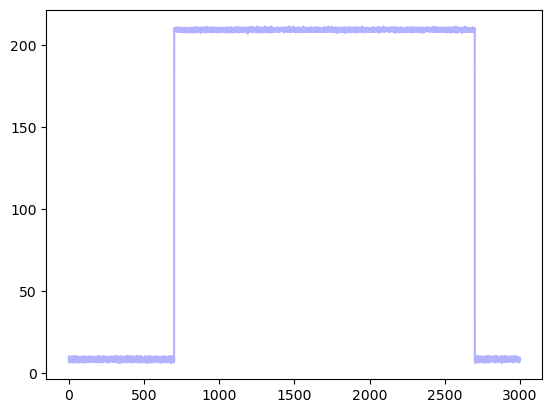

[522]
[522, 523]


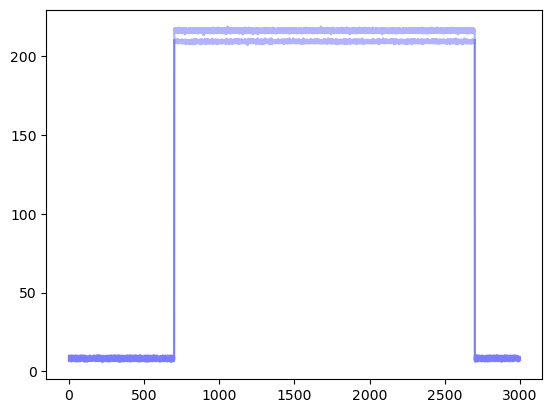

[522]
[522, 523]
[522, 523, 524]


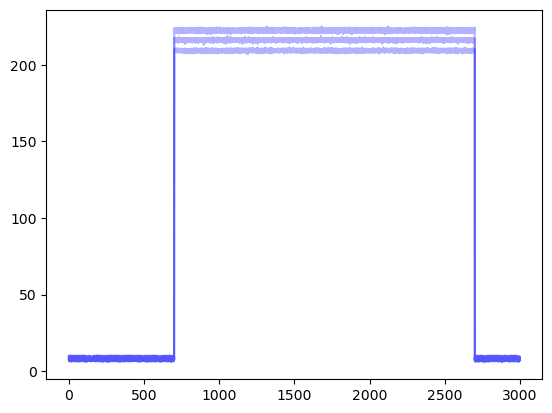

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]


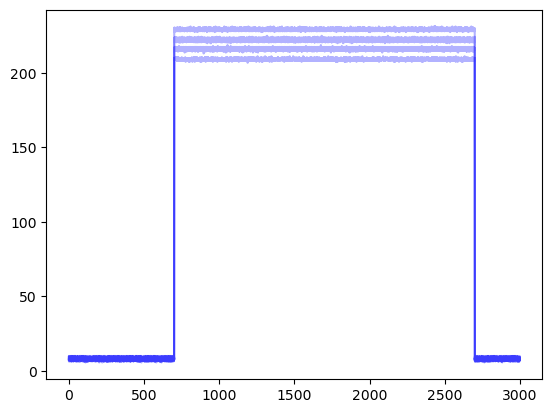

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]


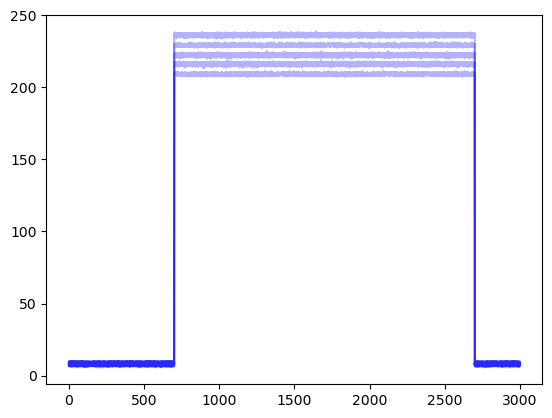

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]


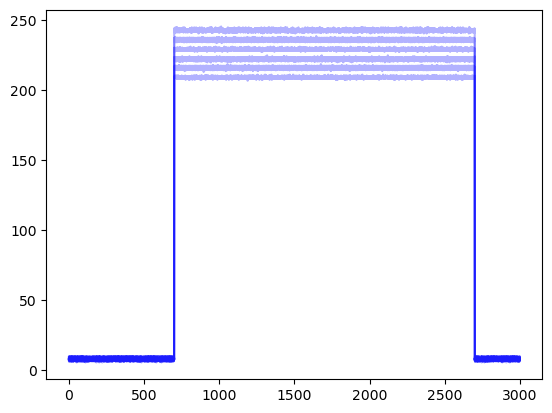

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]


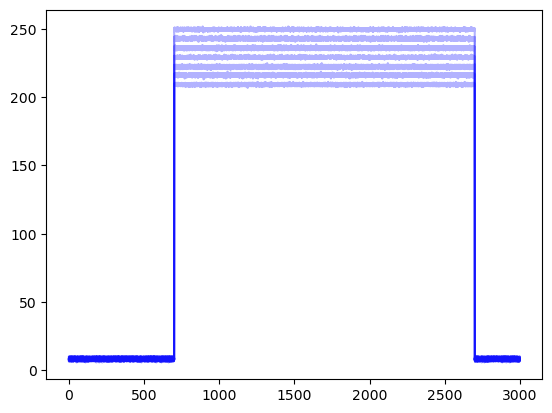

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]


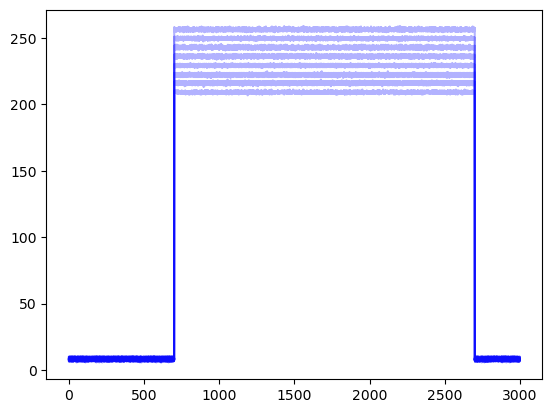

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]


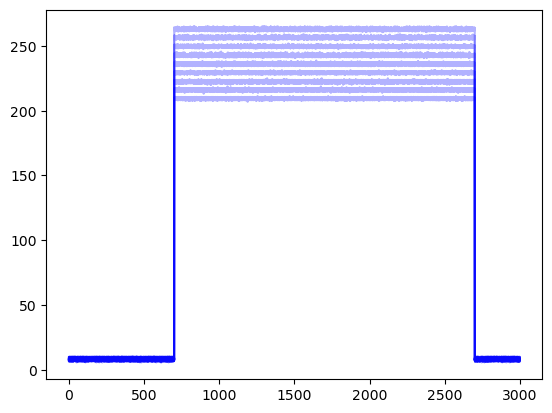

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]


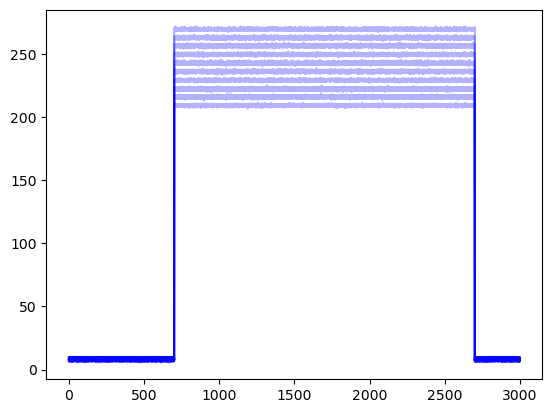

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]


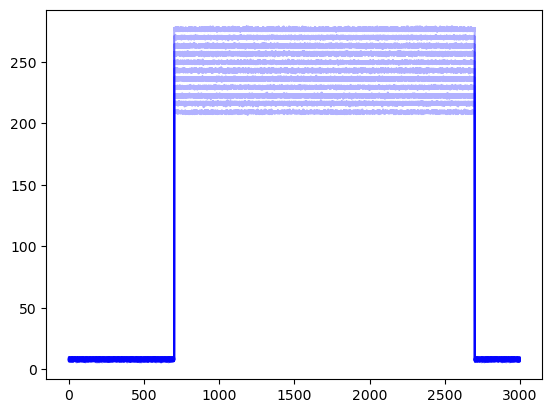

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]


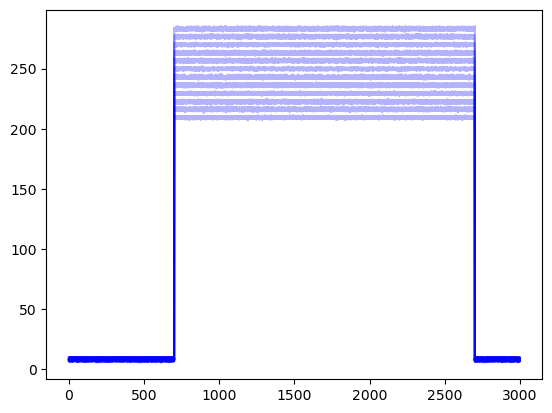

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]


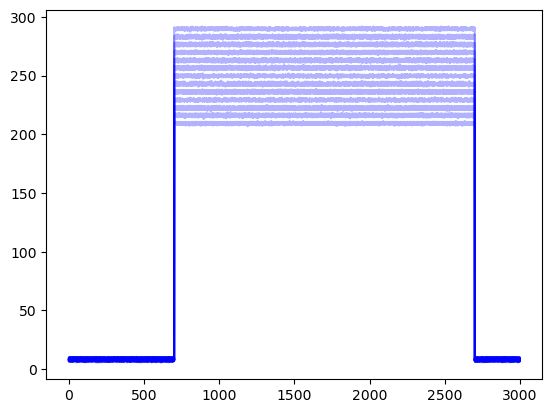

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]


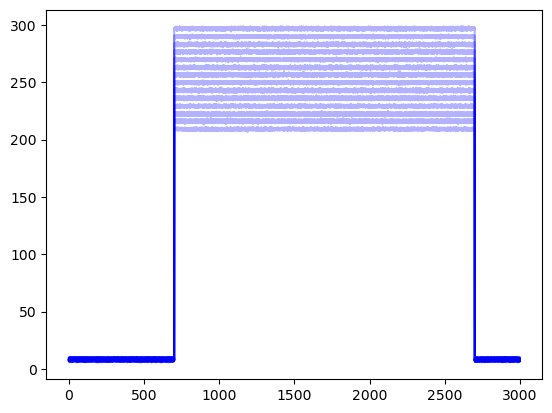

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]


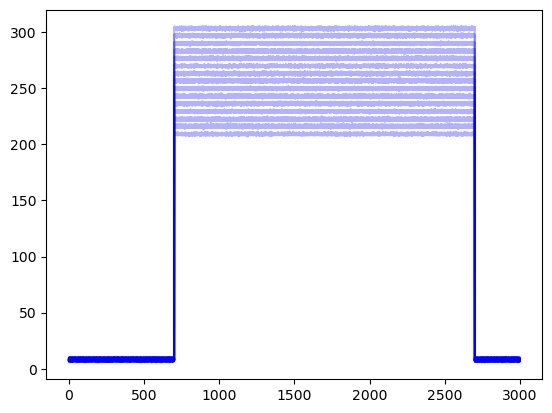

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]


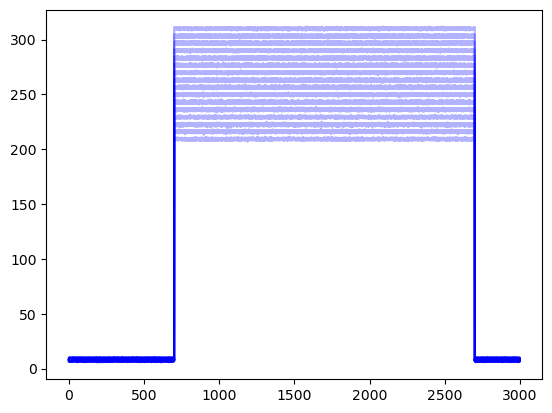

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]


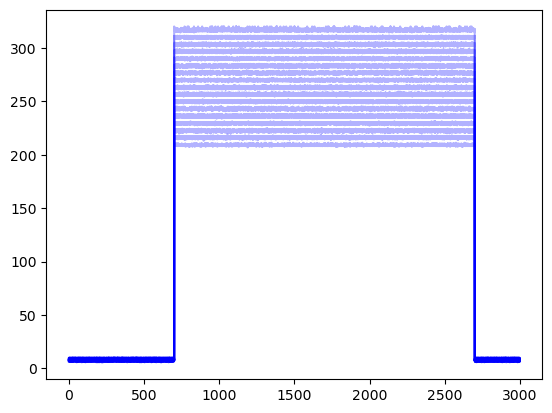

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]


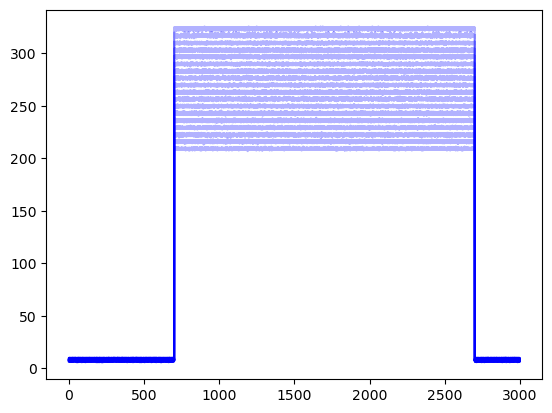

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]


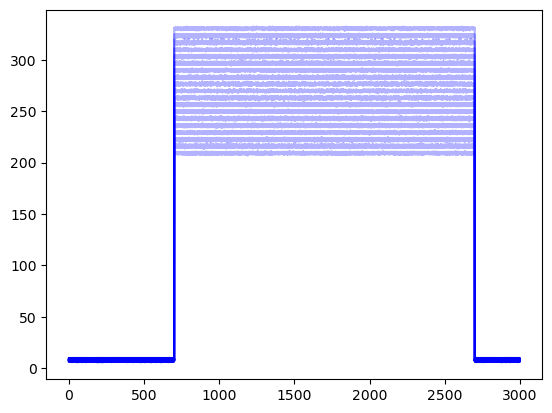

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

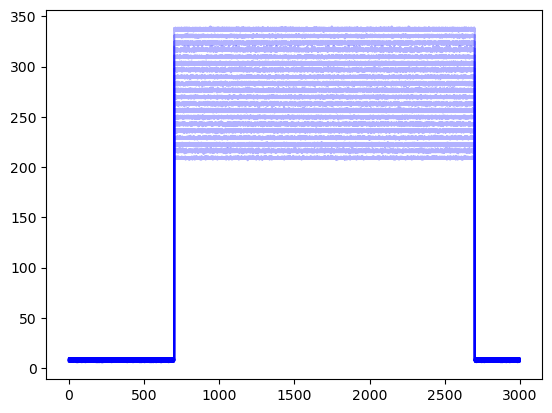

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

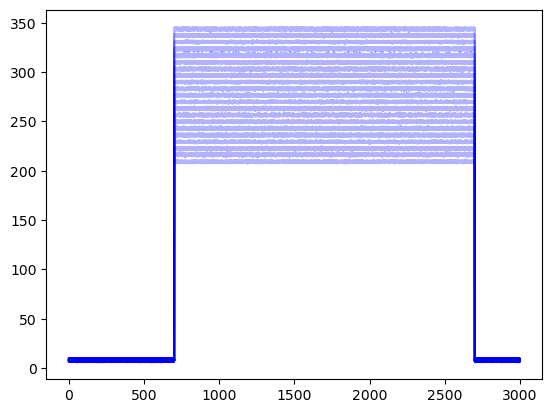

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


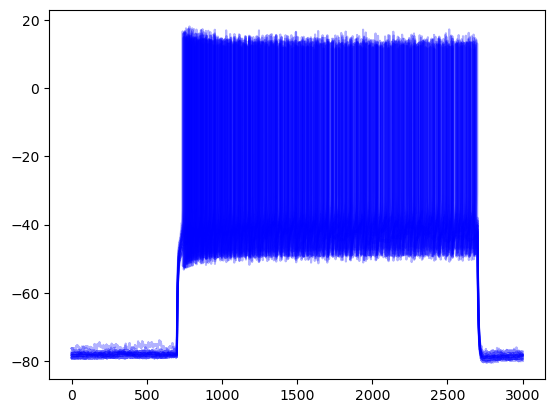

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


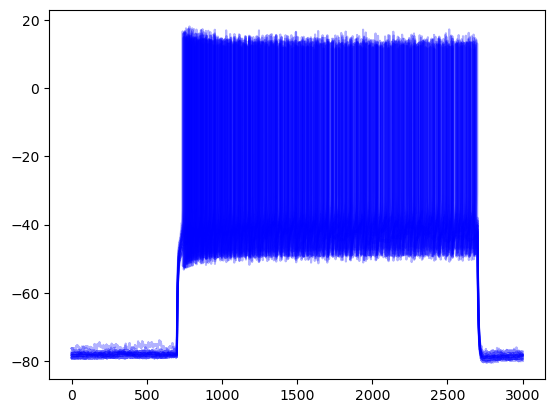

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


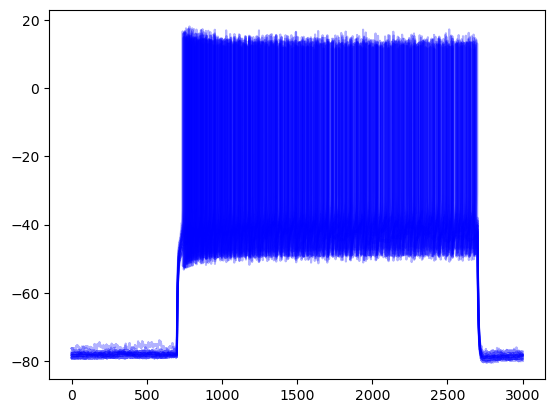

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


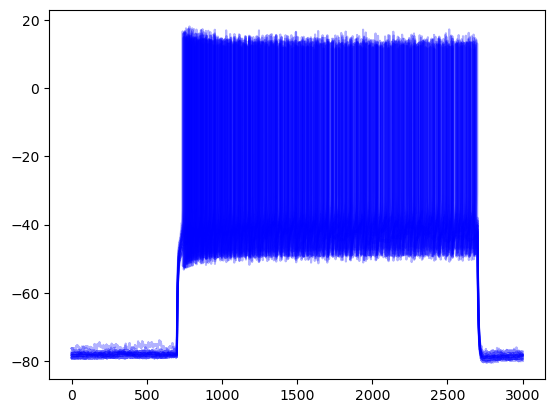

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


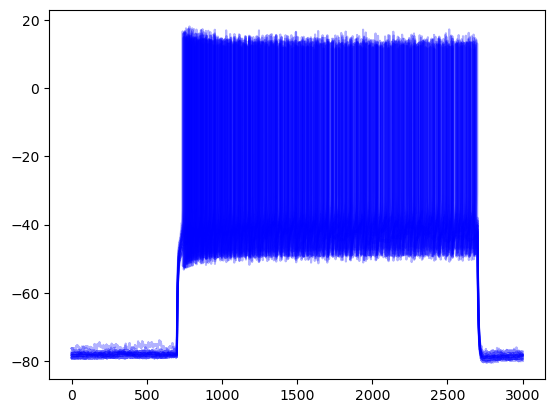

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


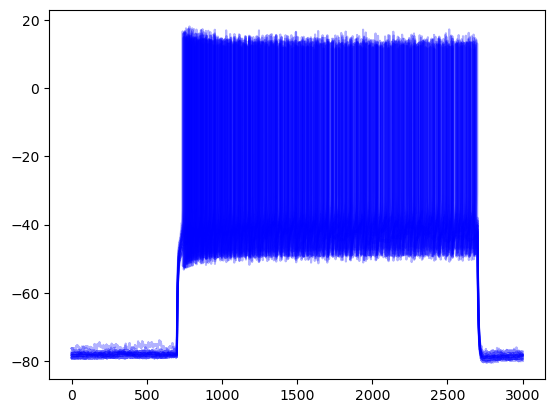

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


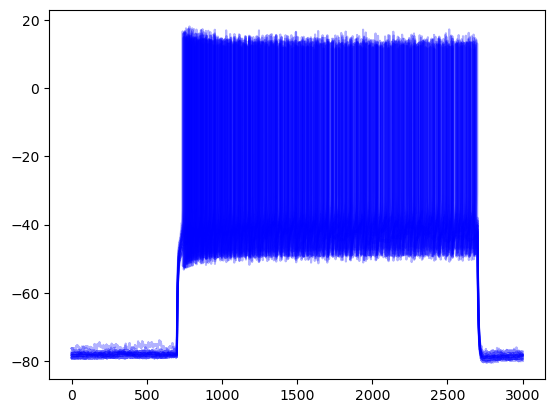

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


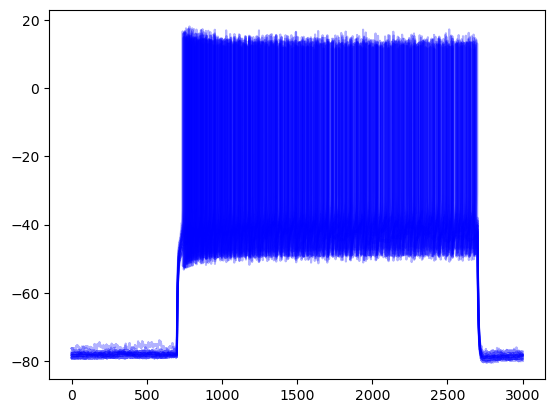

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


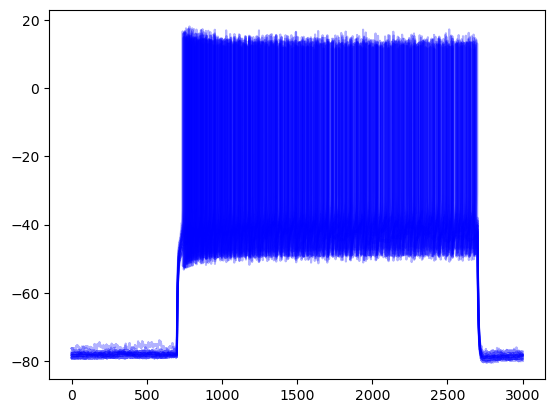

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


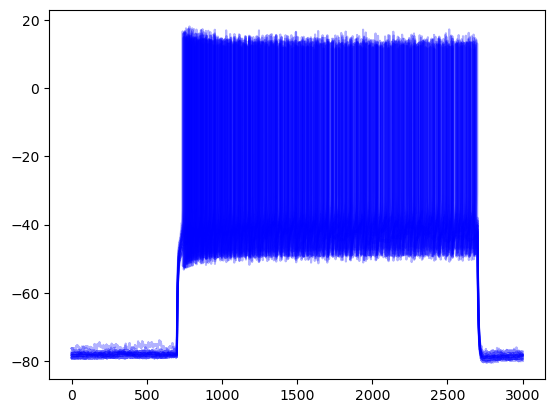

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


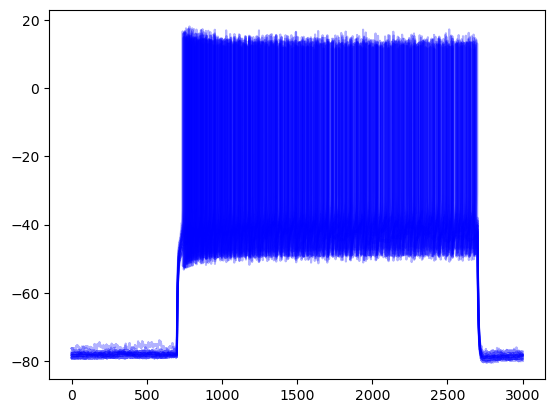

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


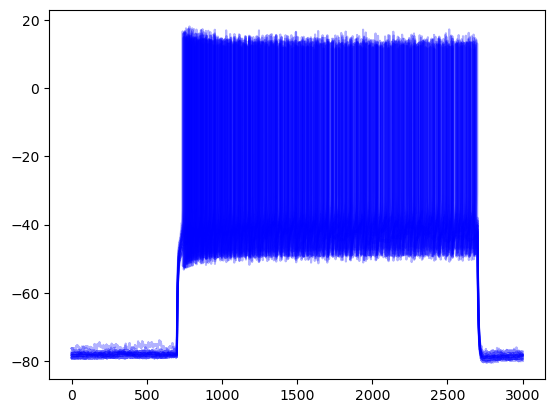

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


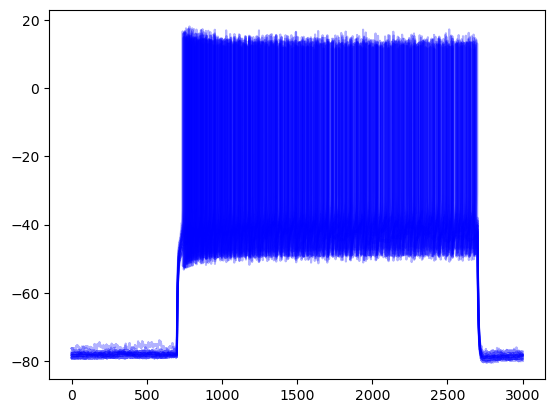

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


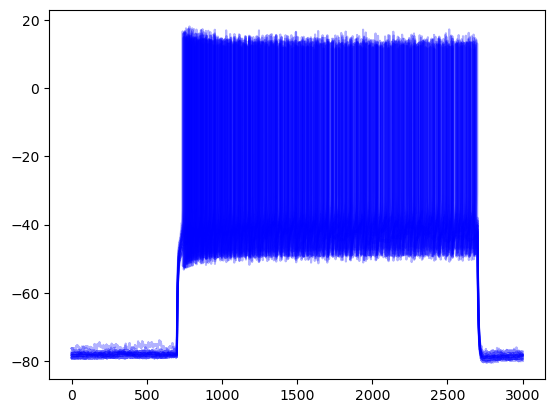

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


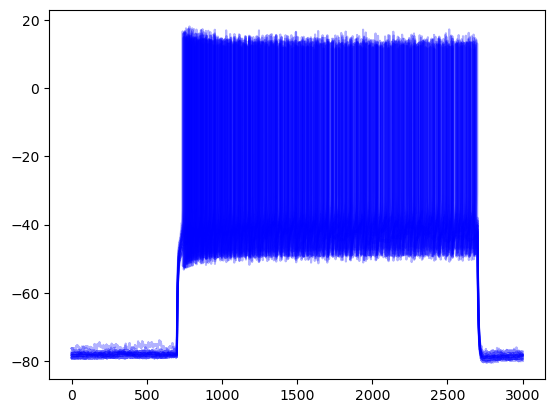

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


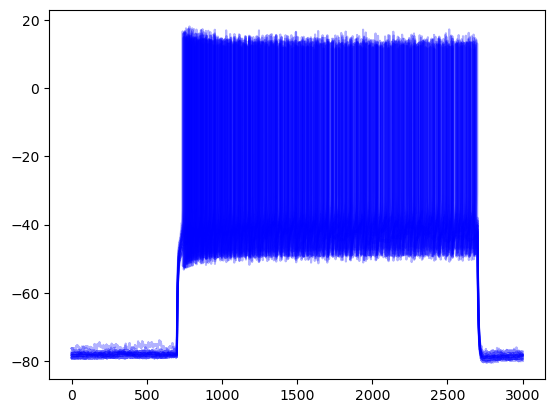

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


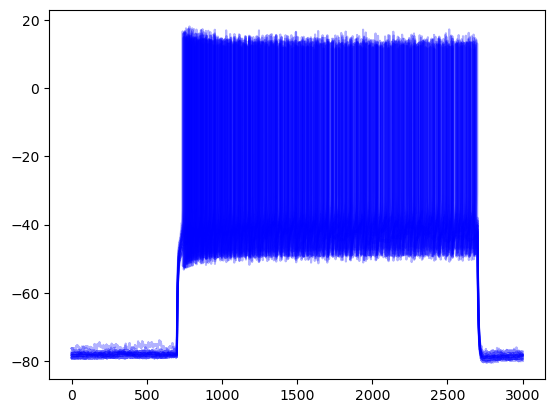

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


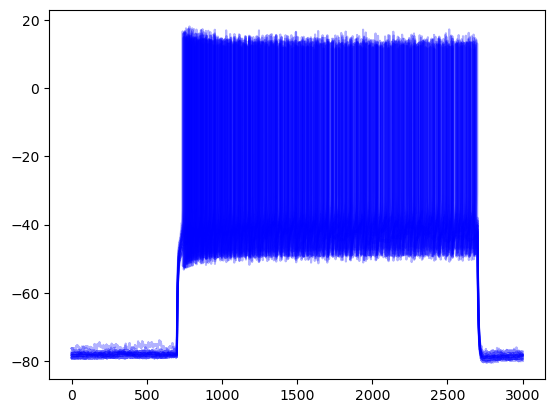

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


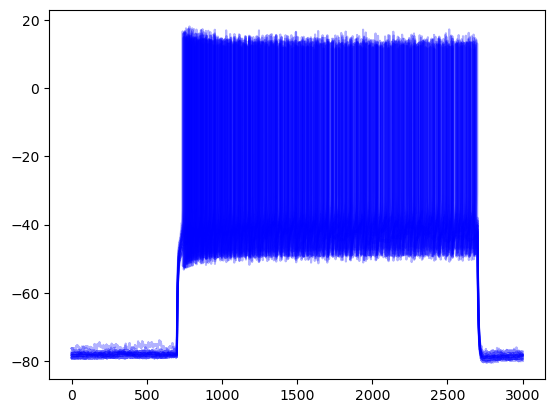

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


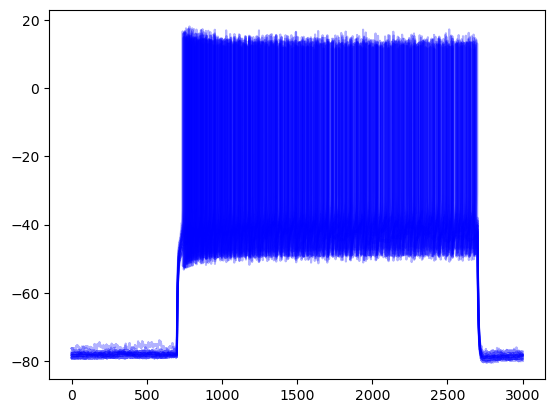

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


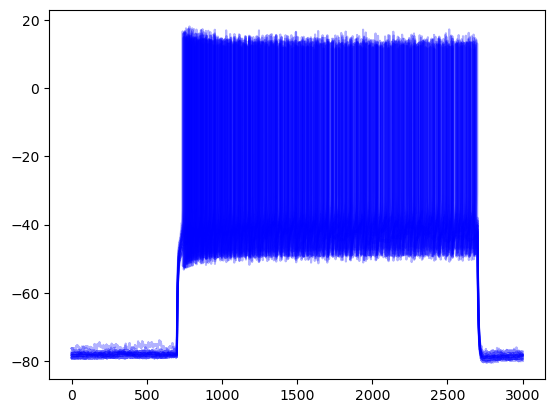

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

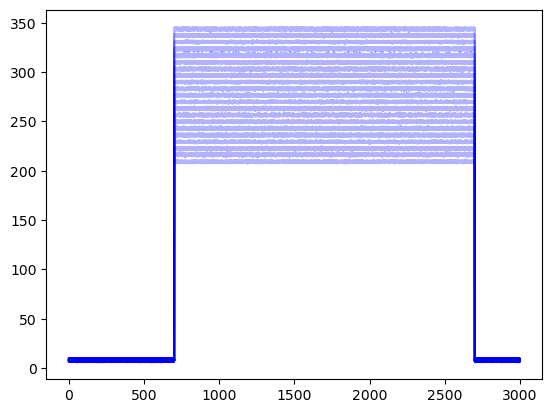

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

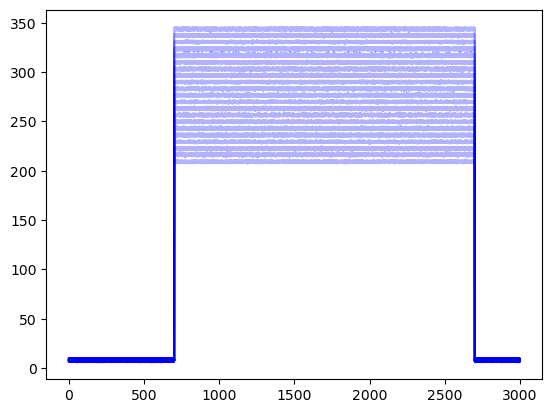

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

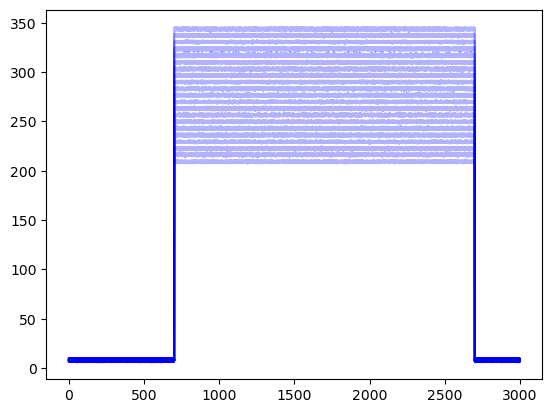

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

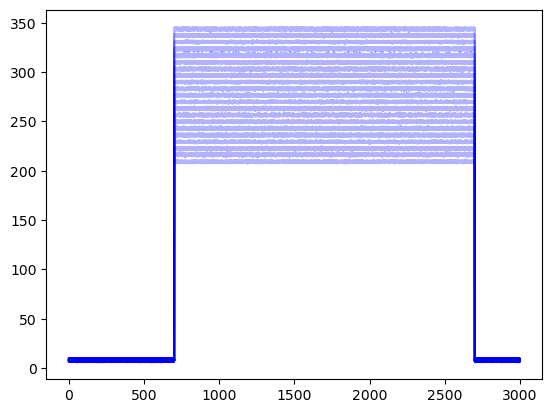

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

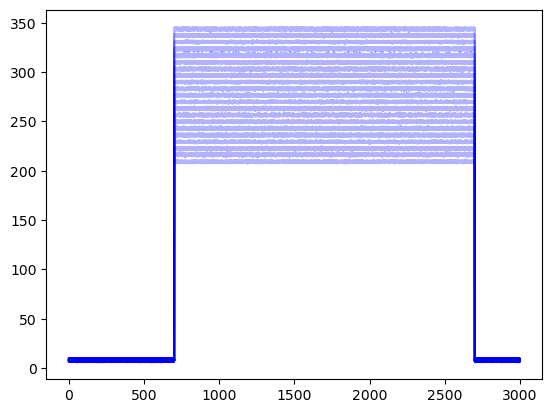

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

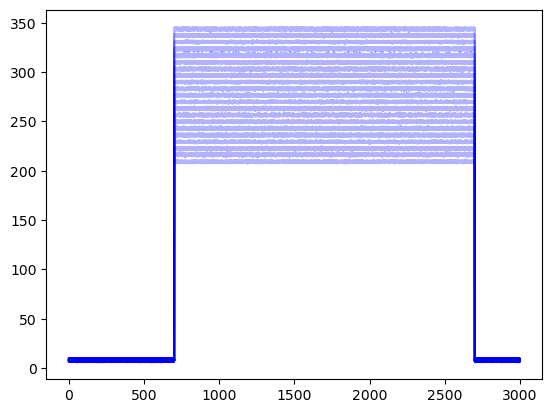

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

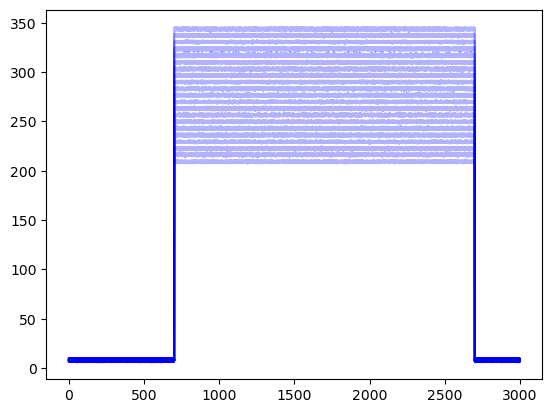

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

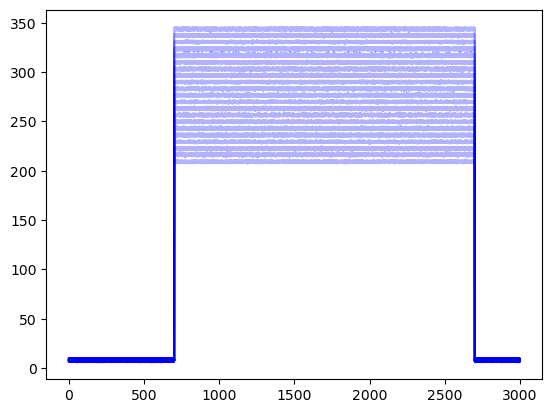

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

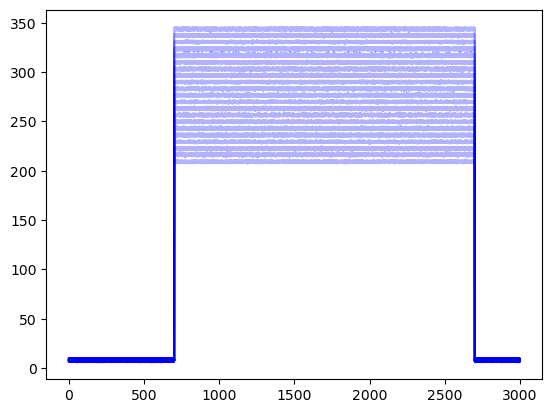

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

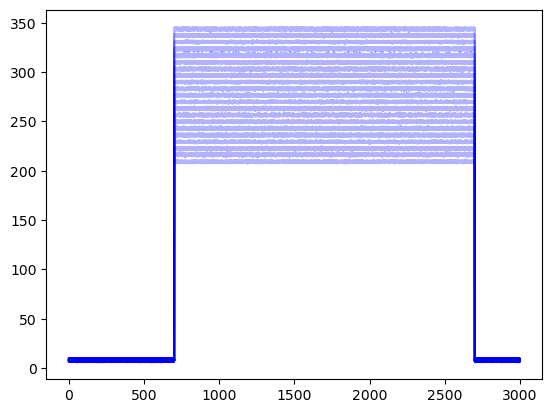

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

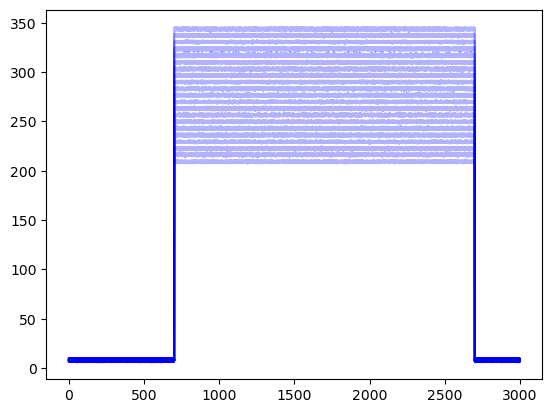

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

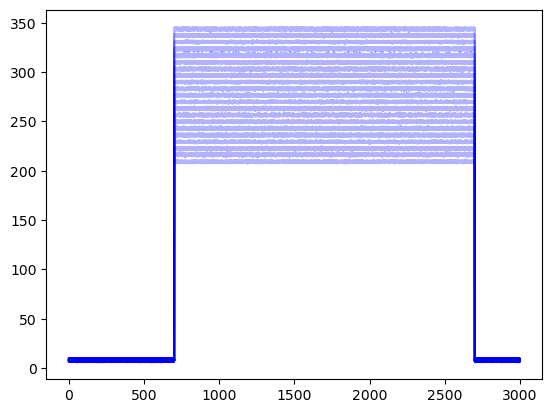

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

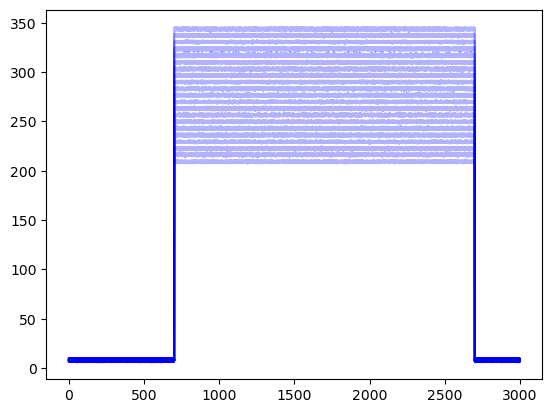

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

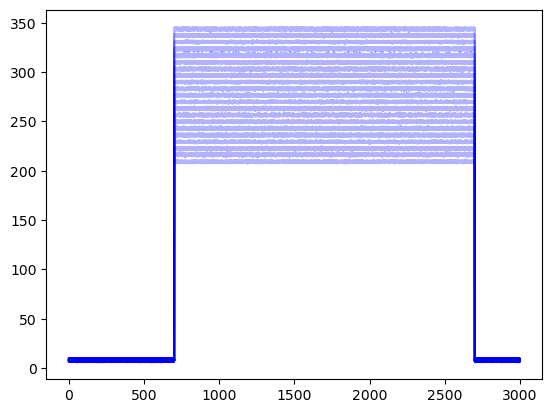

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

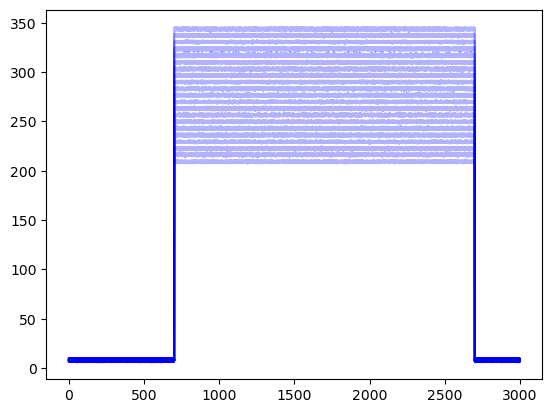

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

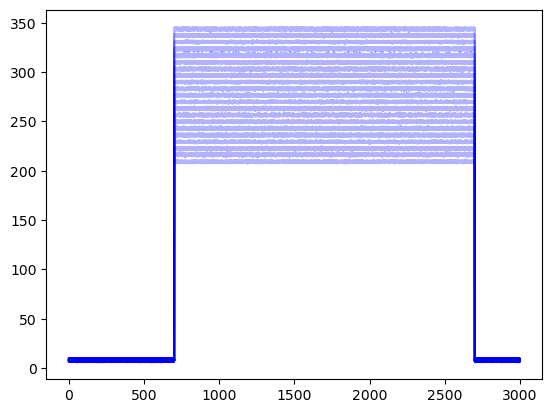

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

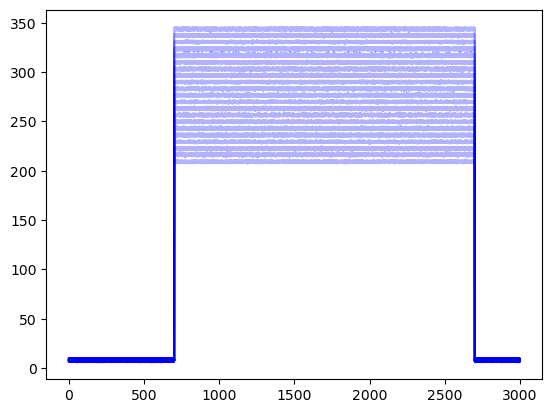

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

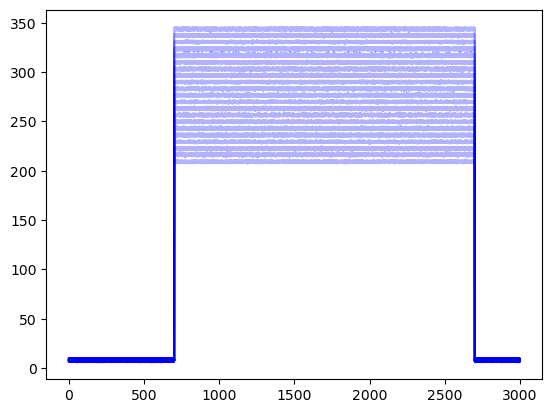

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

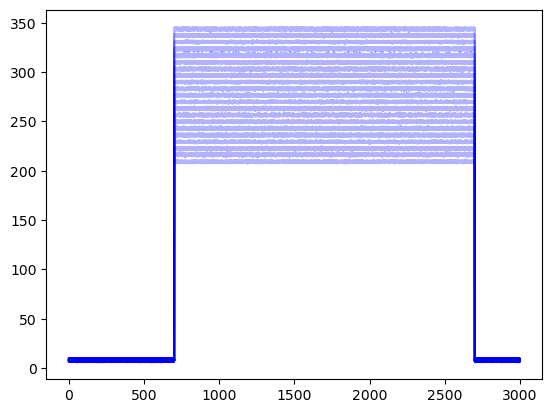

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

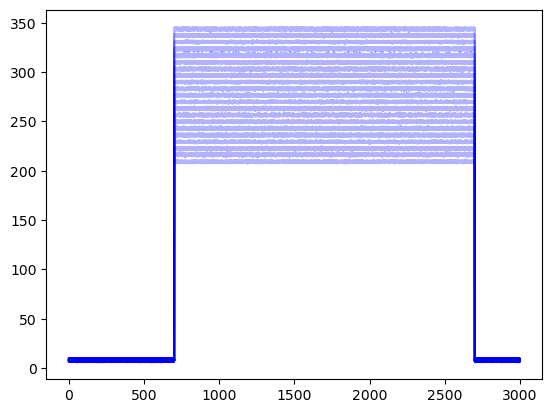

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

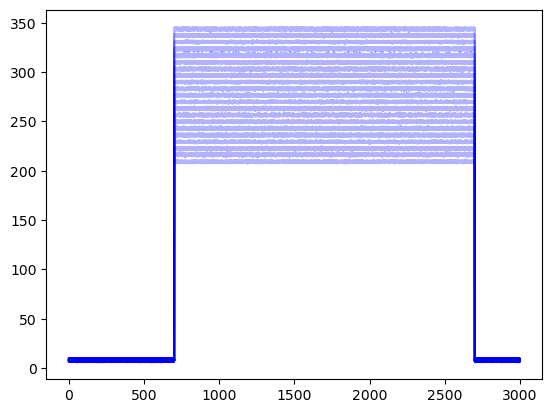

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


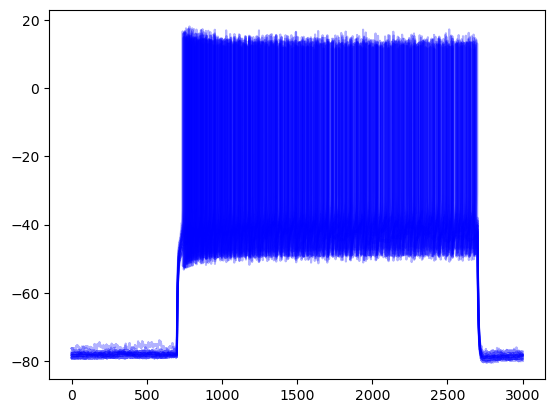

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


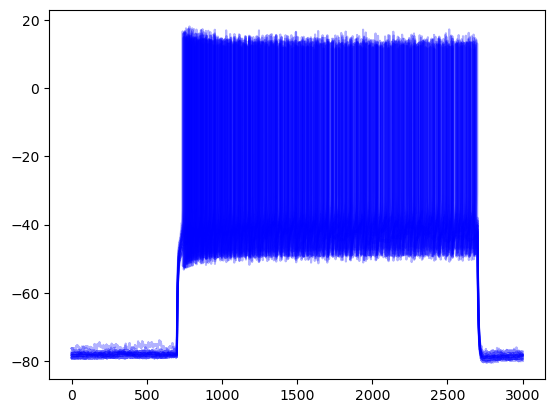

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


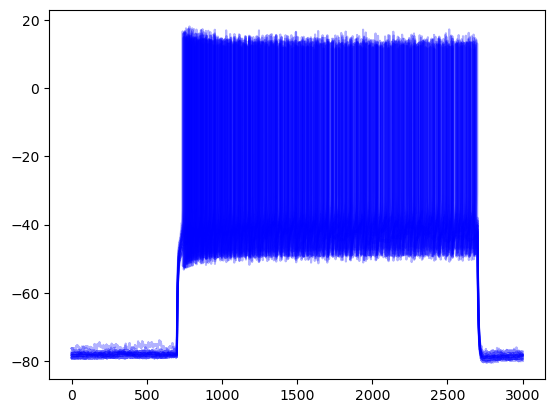

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


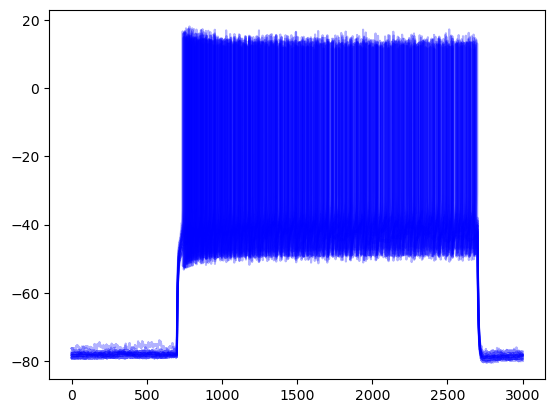

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


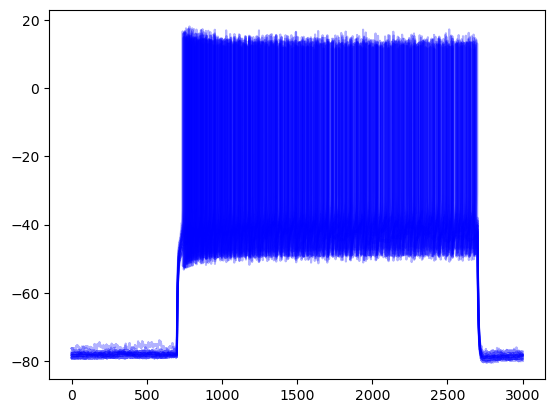

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


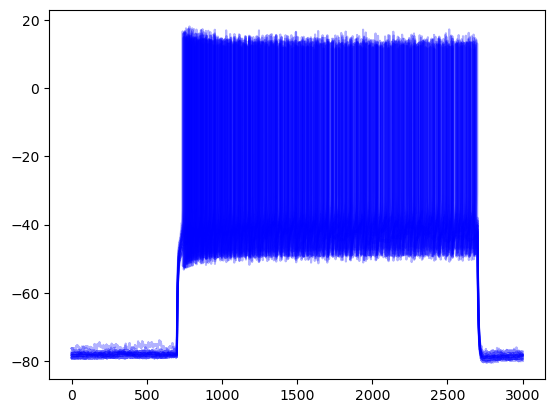

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


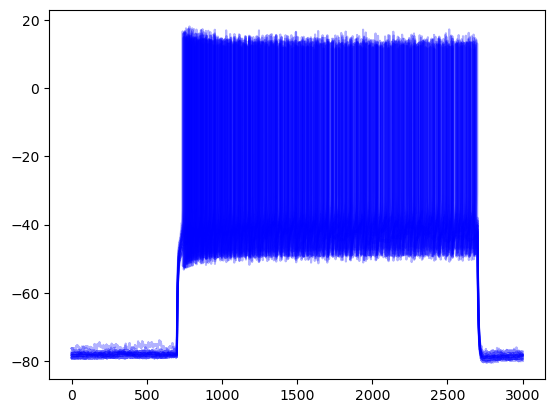

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


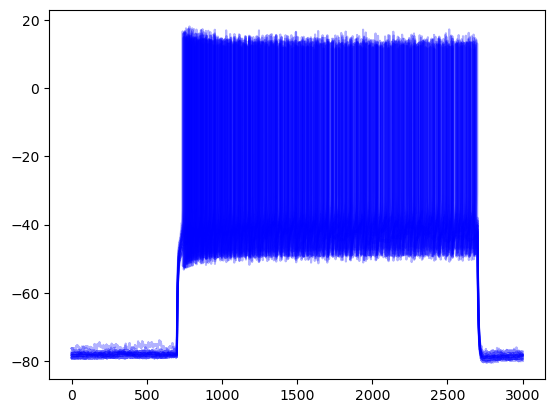

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


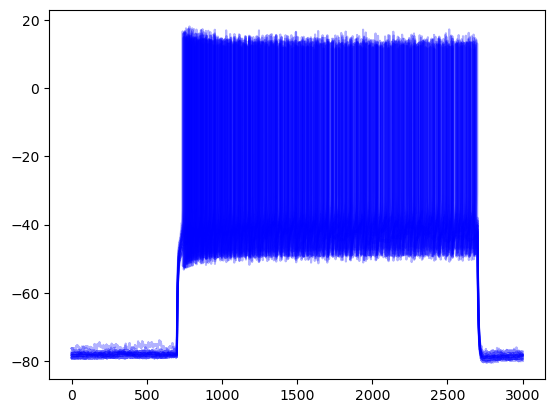

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


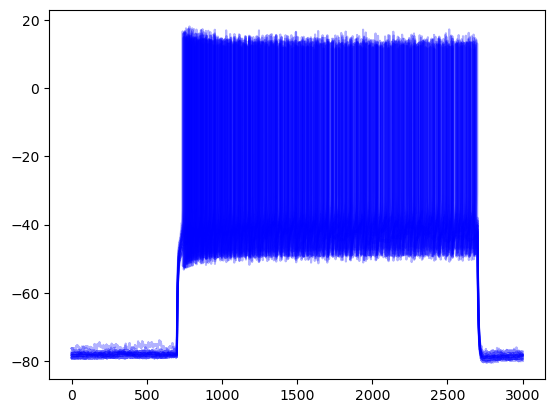

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


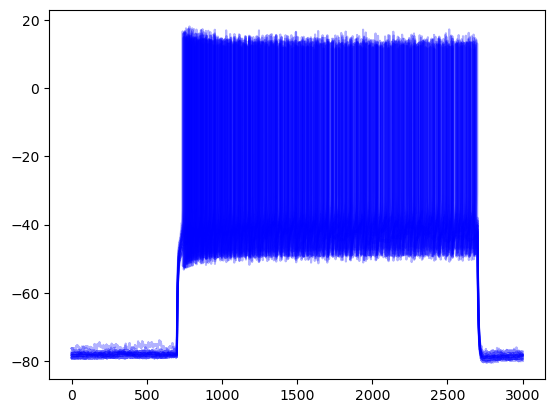

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


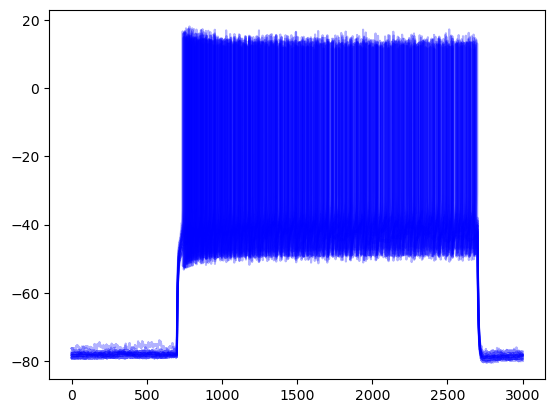

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


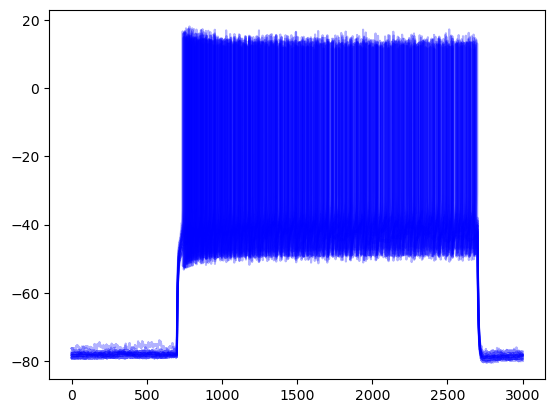

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


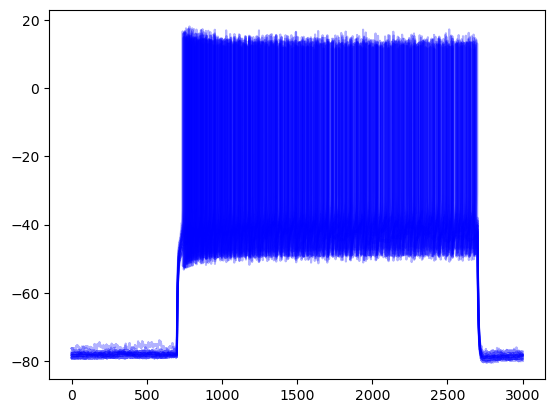

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


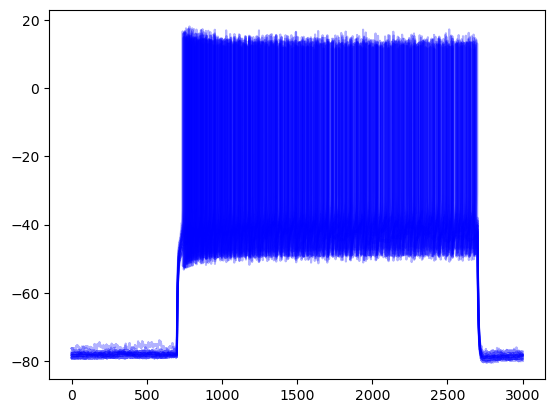

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


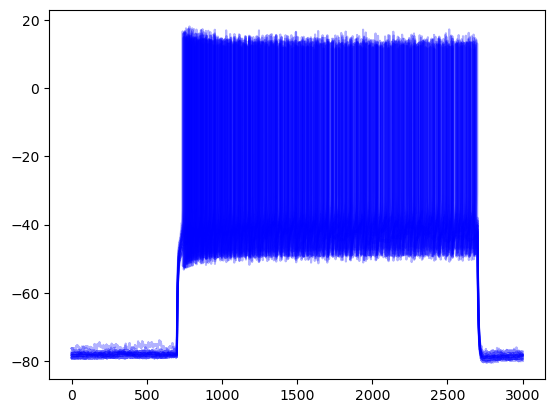

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


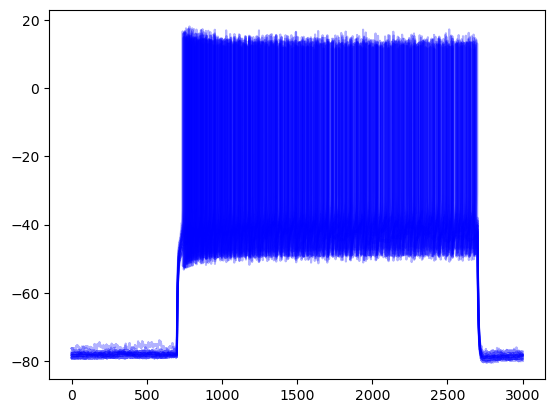

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


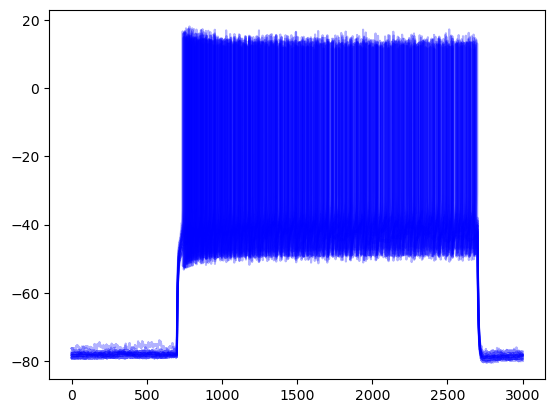

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


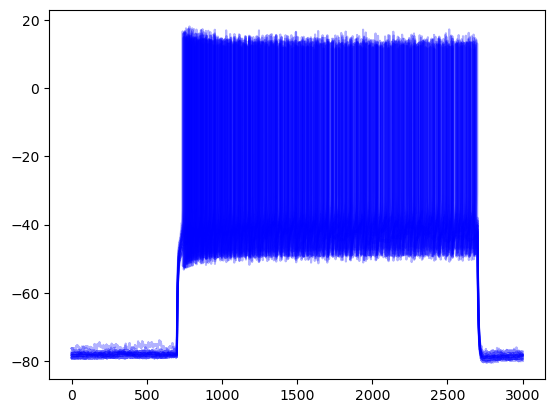

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


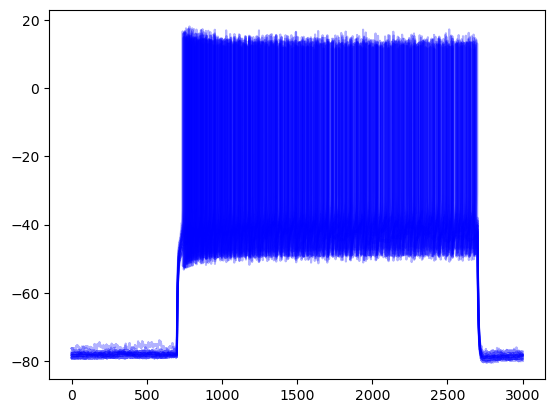

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


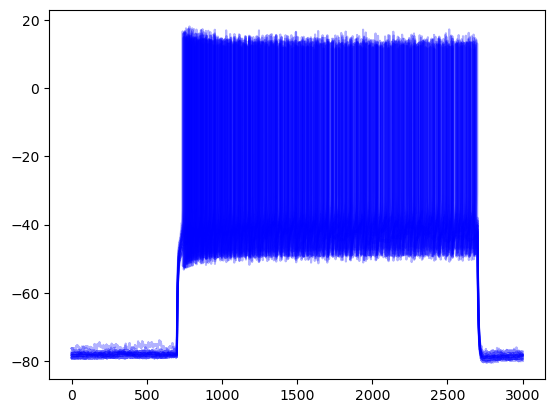

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

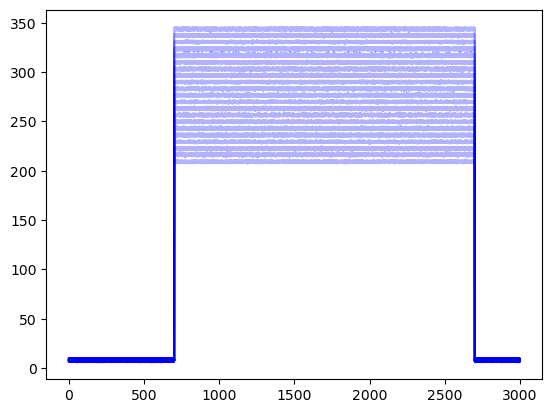

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

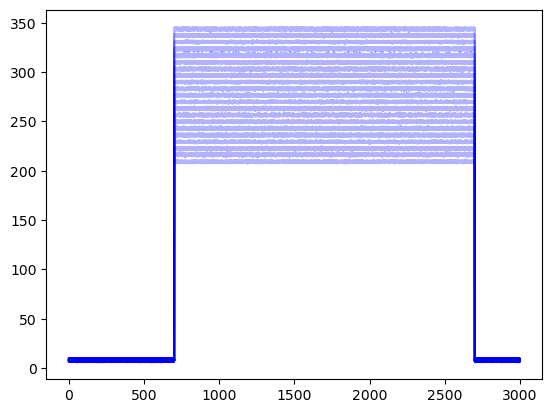

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

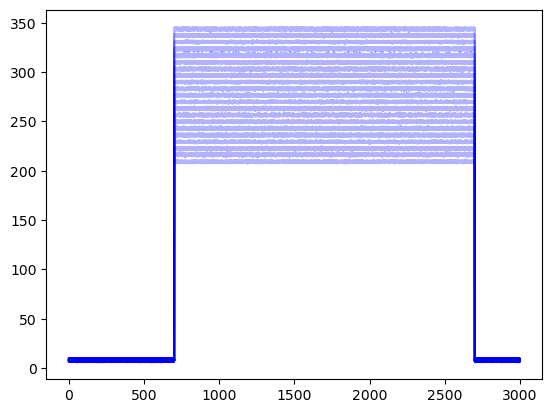

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

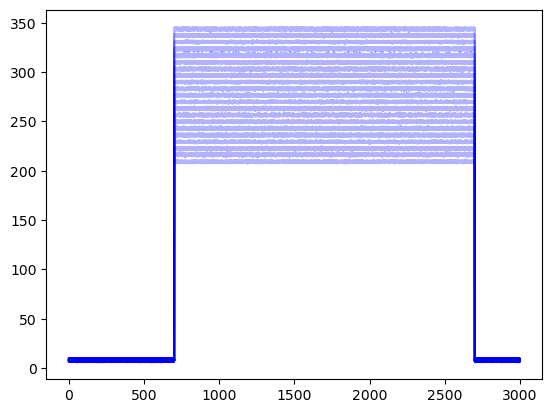

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

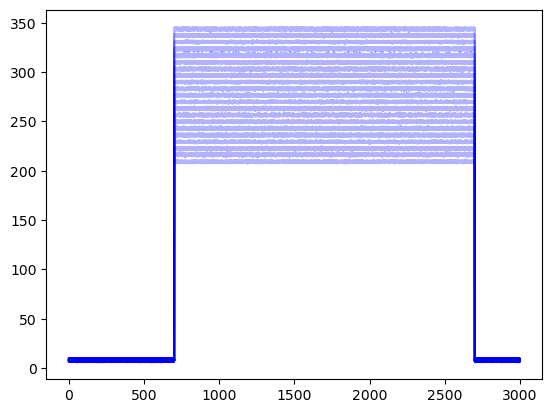

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

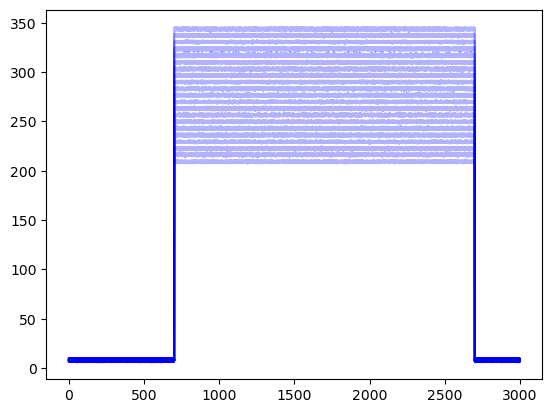

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

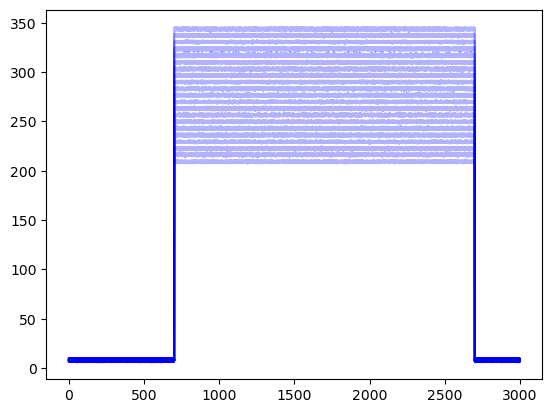

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

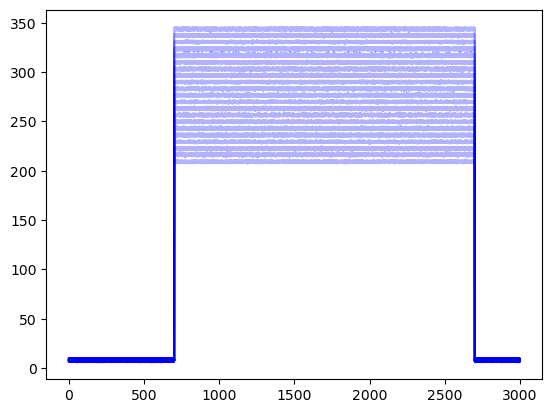

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

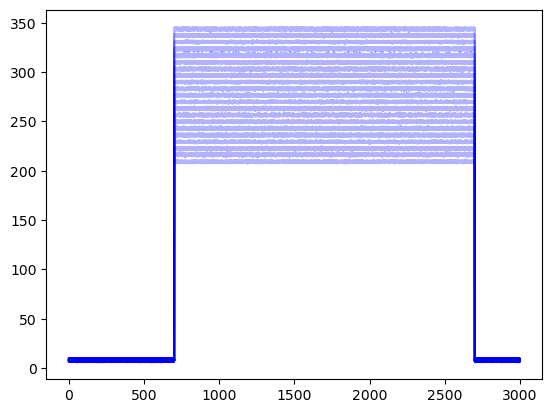

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

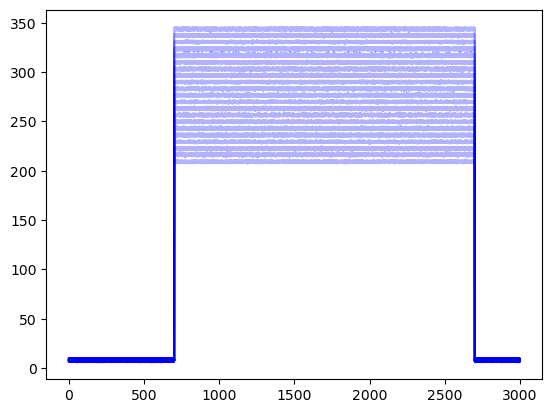

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

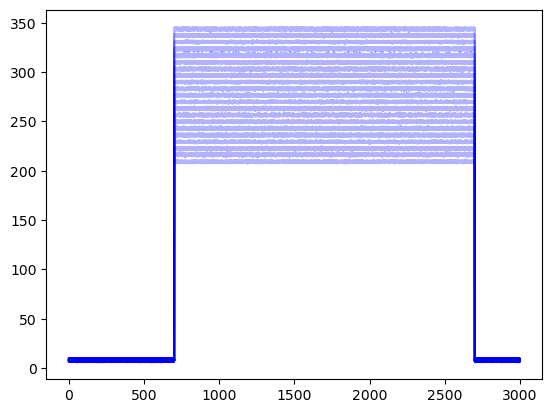

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

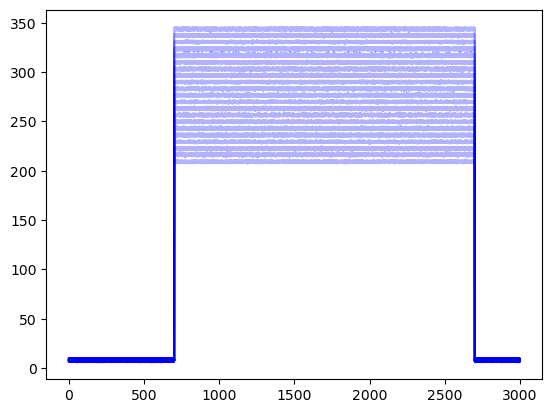

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

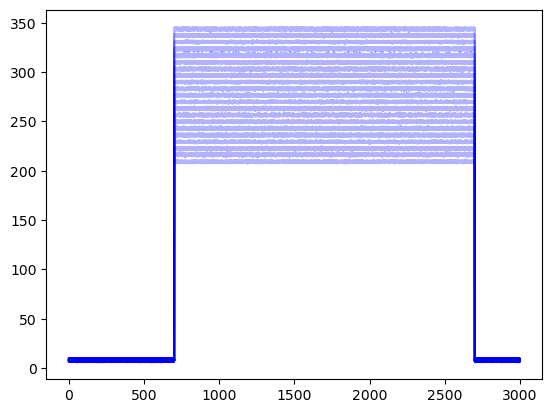

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

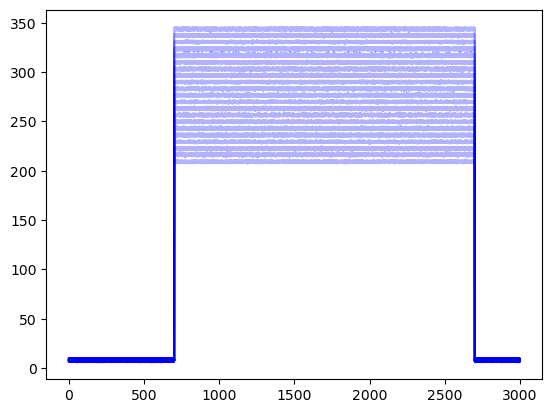

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

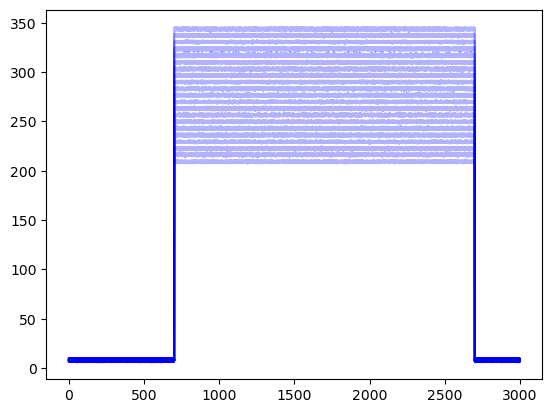

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

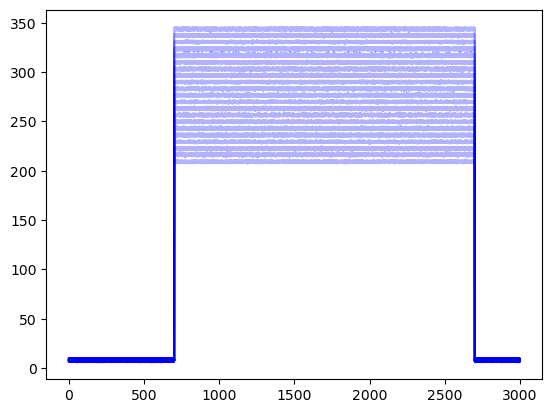

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

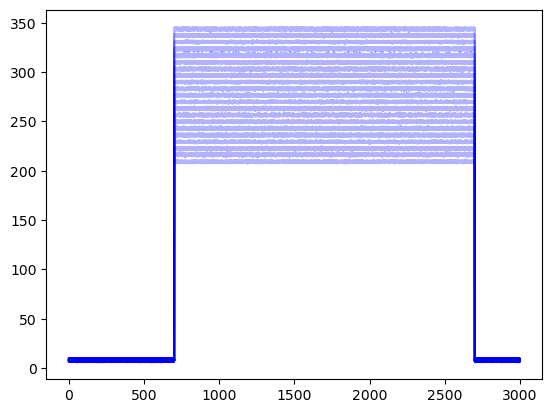

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

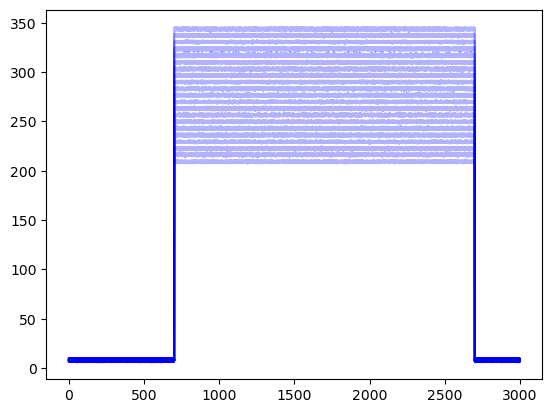

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

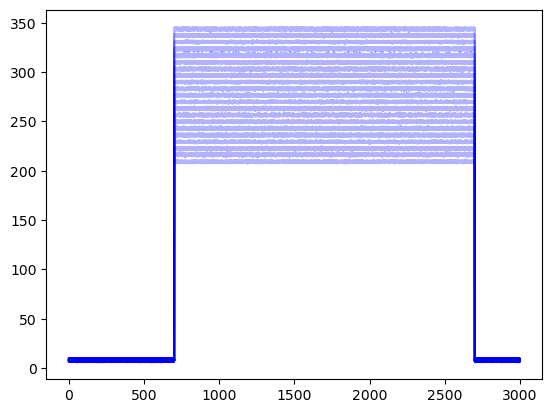

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

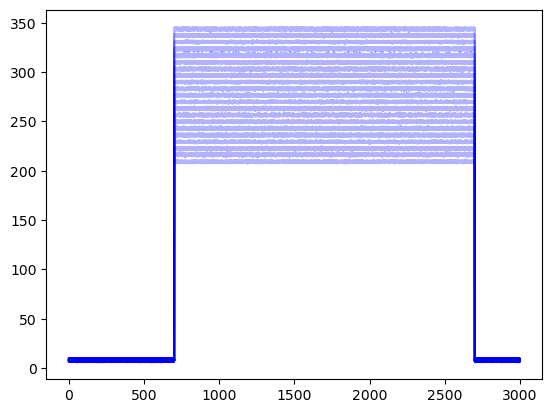

[522]
[522, 523]
[522, 523, 524]
[522, 523, 524, 525]
[522, 523, 524, 525, 526]
[522, 523, 524, 525, 526, 527]
[522, 523, 524, 525, 526, 527, 528]
[522, 523, 524, 525, 526, 527, 528, 529]
[522, 523, 524, 525, 526, 527, 528, 529, 530]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[522, 523, 524, 525, 526, 527, 

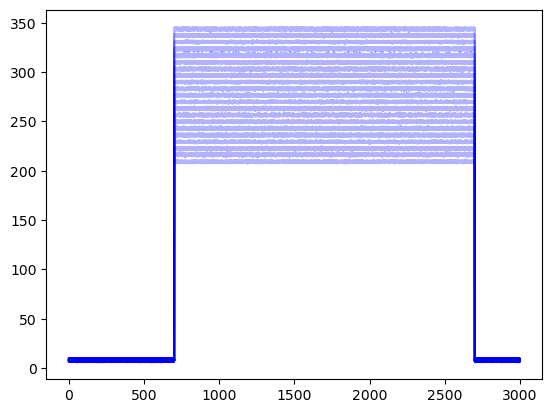

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


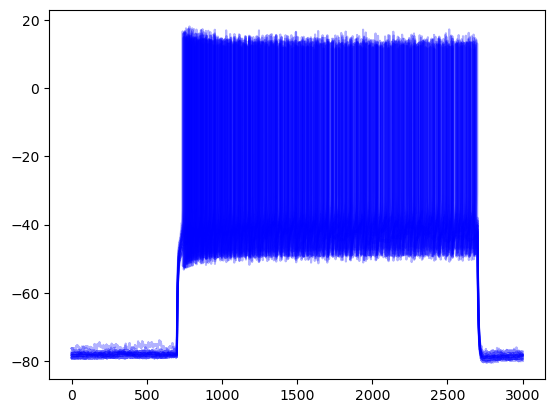

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


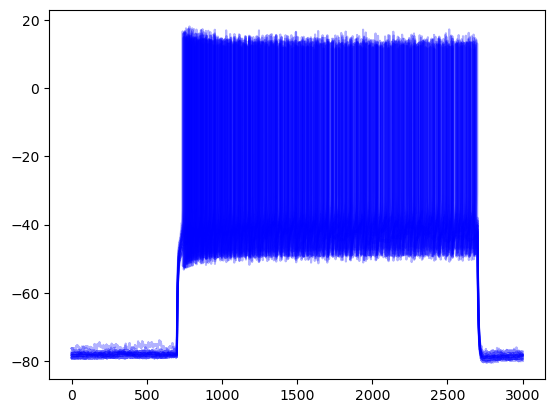

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


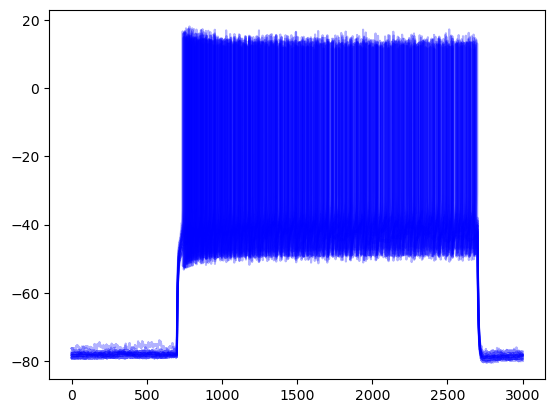

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]
[527, 528, 529, 530, 531, 532]
[527, 528, 529, 530, 531, 532, 533]
[527, 528, 529, 530, 531, 532, 533, 534]
[527, 528, 529, 530, 531, 532, 533, 534, 535]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541]
[527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]


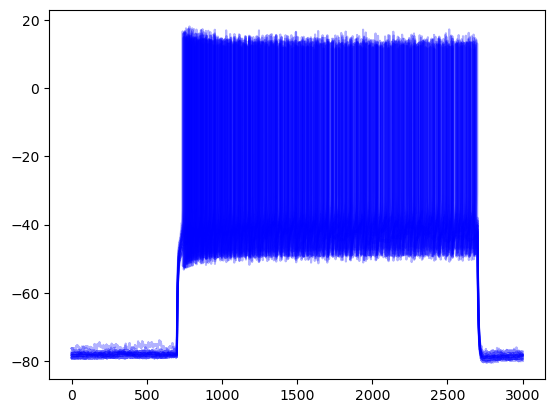

[527]
[527, 528]
[527, 528, 529]
[527, 528, 529, 530]
[527, 528, 529, 530, 531]


KeyboardInterrupt: 

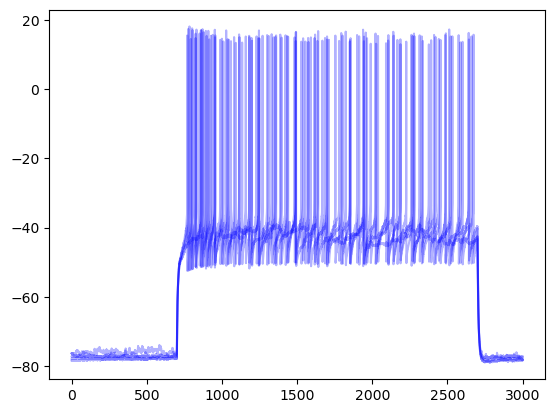

In [84]:
from scipy.signal import find_peaks

protocol = 'IDthresh'
feature_protocol = protocol
vshift=0
input_resistance=False
prefix = 'ECall'


dict_f = {}
repetitions = []
for foldername in foldername_list:
    cell_type = 'FS'
    cell_path = 'fs/derived/'
    cell_id = foldername
    cell = cell_path + '160628_FS2'
    filename_list = os.listdir('fs/derived/160628_FS2')

    for filename in filename_list:
        if protocol in filename:
            channel_id = []
            repetitions.append(((int(filename.split('_')[-1].split('.')[0])))) 
            channel_id.append(int(filename.split('_')[2][2:]))
            current_id = min(channel_id)
            voltage_id = max(channel_id)
            repetitions2 = np.unique(repetitions)

            channels = {'current': current_id, 'voltage': voltage_id}
            spec = {}
            spec['cell_id'] = cell_id
            spec['cell_type'] = cell_type
            spec['cell_features'] = {}
            spec['temperature'] = 35
            spec['liquid_junction_potential'] = liquid_junction_potential

            list_rec = []
            for rec in  repetitions2:
                fullname = cell + '/' + prefix + '_' + protocol \
                + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'

                data = np.loadtxt(fullname)
                time = data[:, 0]
                voltage = data[:, 1]
                peak_tuple = find_peaks(voltage, height= -30)
                if peak_tuple[0].size > 1:
                    list_rec.append(rec)



In [85]:
from scipy.signal import find_peaks

protocol = 'IDthresh'
feature_protocol = protocol
vshift=0
input_resistance=False
prefix = 'ECall'


dict_f = {}
repetitions = []
for foldername in foldername_list:
    cell_type = 'FS'
    cell_path = 'fs/derived/'
    cell_id = foldername
    cell = cell_path + cell_id
    filename_list = os.listdir('fs/derived/160628_FS2')

    for filename in filename_list:
        if protocol in filename:
            channel_id = []
            repetitions.append(list(np.unique(int(filename.split('_')[-1].split('.')[0])))) 
            channel_id.append(int(filename.split('_')[2][2:]))
            current_id = min(channel_id)
            voltage_id = max(channel_id)
            channels = {'current': current_id, 'voltage': voltage_id}

            spec = {}
            spec['cell_id'] = cell_id
            spec['cell_type'] = cell_type
            spec['cell_features'] = {}
            spec['temperature'] = 35
            spec['liquid_junction_potential'] = liquid_junction_potential

            list_rec = []
            for rec in  repetitions:
                fullname = cell + '/' + prefix + '_' + protocol \
                + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'

                data = np.loadtxt(fullname)
                time = data[:, 0]
                voltage = data[:, 1]
                peak_tuple = find_peaks(voltage, height= -30)
                if peak_tuple[0].size > 1:
                    list_rec.append(rec)

                    
            repetitions = [list_rec]  
            features_train = ['AHP_depth', 'AHP_depth_abs', 'AHP_depth_abs_slow',
                  'AHP_slow_time', 'AHP_time_from_peak', 'AP_amplitude',
                  'AP_begin_voltage', 'AP_fall_rate', 'AP_rise_rate', 
                  'ISI_CV', 'Spikecount', 'adaptation_index2', 
                  'inv_first_ISI', 'mean_frequency',
                  'min_voltage_between_spikes', 'peak_voltage',
                  'spike_half_width', 'steady_state_voltage', 
                  'time_to_first_spike', 'voltage_base']
            features = features_train

            spec['cell_features'][feature_protocol] = []
            for recordings in repetitions:
                res = extract(features, cell, prefix, protocol, channels, recordings, 
                        timing={'stimulus_start': 100, 'stimulus_end': 1100},
                            vshift=liquid_junction_potential)
                spec['cell_features'][feature_protocol].extend(res)

    fi = {}
    fi_bis = {}
    
    fi[f'{foldername}'] =[]
    fi_bis[f'{foldername}'] =[]

    for stim, feat in spec['cell_features']['IDthresh']:
        fi[f'{foldername}'].append((stim['stimulus_total_amp'], feat['mean_frequency'][0]))
        fi_bis[f'{foldername}'].append((stim['stimulus_total_amp'], feat['inv_first_ISI'][0]))
    fi[f'{foldername}'].sort(key=lambda x: x[0])
    fi_bis[f'{foldername}'].sort(key=lambda x: x[0])






FileNotFoundError: fs/derived/160628_FS2/ECall_IDthresh_ch4_[522].dat not found.

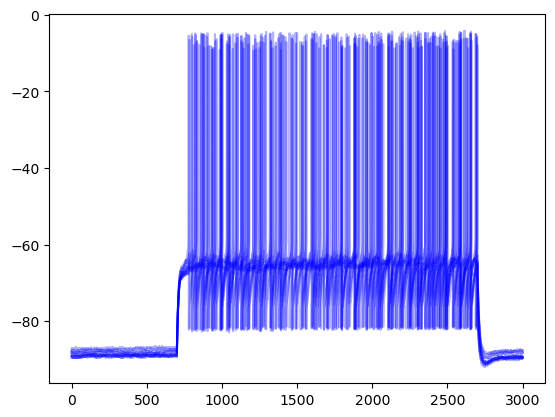

In [26]:
from scipy.signal import find_peaks

cell_type = 'FS'
cell_path = 'fs/derived/'
cell_id = '180418_FS5'
cell = cell_path + cell_id
prefix = 'ECall'
channels = {'current': 6, 'voltage': 7}
liquid_junction_potential = 9.5

spec = {}
spec['cell_id'] = cell_id
spec['cell_type'] = cell_type
spec['cell_features'] = {}
spec['temperature'] = 35
spec['liquid_junction_potential'] = liquid_junction_potential

protocol = 'IDthresh'
feature_protocol = protocol
path = cell
vshift=0
input_resistance=False

list_rec = []
for rec in  range(1925, 1945):
    fullname = path + '/' + prefix + '_' + protocol \
    + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    time = data[:, 0]
    voltage = data[:, 1]
    peak_tuple = find_peaks(voltage, height= -30)
    if peak_tuple[0].size > 1:
        list_rec.append(rec)
        plt.plot(time,voltage, 'b', alpha=0.3)
plt.show()


In [29]:
repetitions = [list_rec]  
features_train = ['AHP_depth', 'AHP_depth_abs', 'AHP_depth_abs_slow',
                  'AHP_slow_time', 'AHP_time_from_peak', 'AP_amplitude',
                  'AP_begin_voltage', 'AP_fall_rate', 'AP_rise_rate', 
                  'ISI_CV', 'Spikecount', 'adaptation_index2', 
                  'inv_first_ISI', 'mean_frequency',
                  'min_voltage_between_spikes', 'peak_voltage',
                  'spike_half_width', 'steady_state_voltage', 
                  'time_to_first_spike', 'voltage_base']
features = features_train

spec['cell_features'][feature_protocol] = []
for recordings in repetitions:
    res = extract(features, path, prefix, protocol, channels, recordings, 
              timing={'stimulus_start': 100, 'stimulus_end': 1100},
                 vshift=liquid_junction_potential)
    spec['cell_features'][feature_protocol].extend(res)


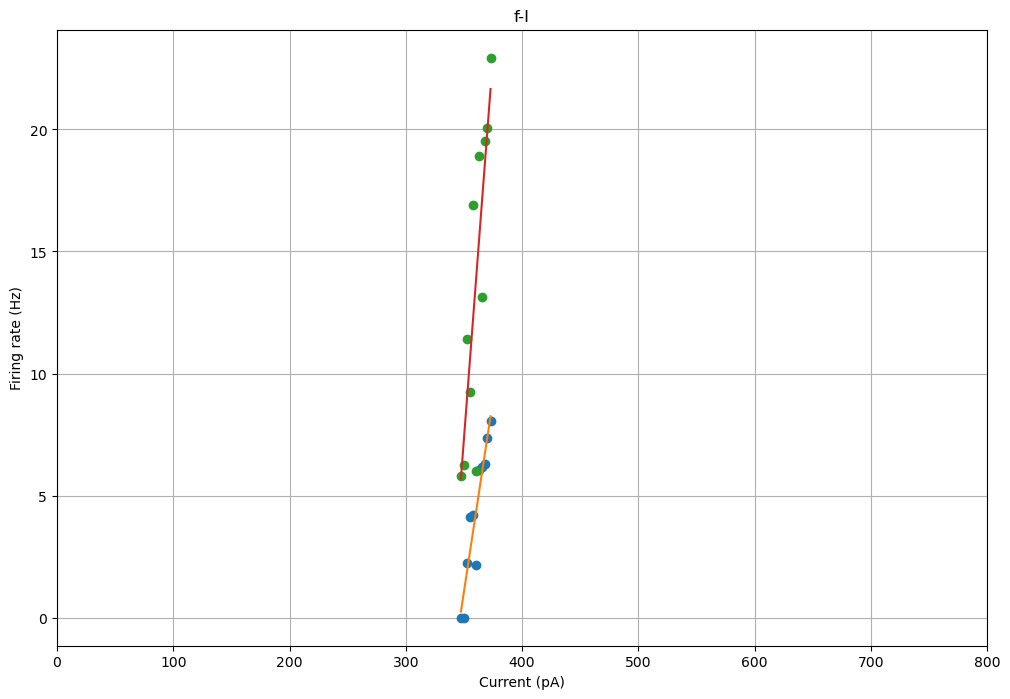

In [30]:
f_i = []
f_i1 = []
for stim, feat in spec['cell_features']['IDthresh']:
    f_i.append((stim['stimulus_total_amp'], feat['mean_frequency'][0]))
    f_i1.append((stim['stimulus_total_amp'], feat['inv_first_ISI'][0]))
f_i.sort(key=lambda x: x[0])
f_i1.sort(key=lambda x: x[0])

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Current (pA)')
ax.set_ylabel('Firing rate (Hz)')
ax.set_title('f-I')
ax.grid()
xx = np.array([x[0] for x in f_i])
yy = np.array([x[1] for x in f_i])
p = np.polyfit(xx, yy, 1)
ax.plot(xx, yy, 'o')
ax.plot(xx, p[1]+p[0]*xx, '-')
x1 = np.array([x[0] for x in f_i1])
y1 = np.array([x[1] for x in f_i1])
p1 = np.polyfit(x1, y1, 1)
ax.plot(x1, y1, 'o')
ax.plot(x1, p1[1]+p1[0]*x1, '-')
plt.xlim(0,800)
plt.show()